# Tutorial 10

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
os.chdir('dogs-vs-cats')

In [5]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('train/cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('train/dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('train/cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('train/dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('train/cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('train/dog*'), 50):
        shutil.move(i, 'test/dog')


In [106]:
train_path = 'dogs-vs-cats/train'
valid_path = 'dogs-vs-cats/valid'
test_path = 'dogs-vs-cats/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [6]:
imgs, labels = next(train_batches)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

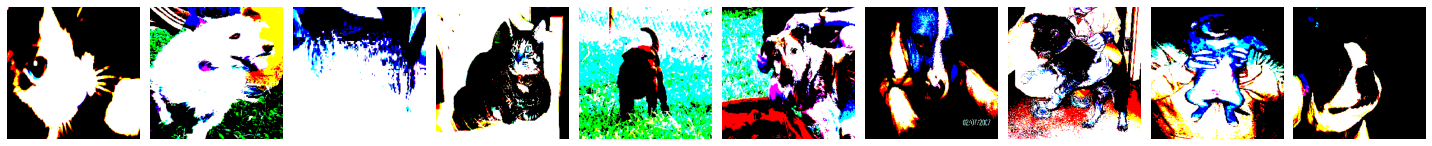

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [15]:
plotImages(imgs)
print(labels)

# Tutorial 12

In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 17s - loss: 19.8701 - accuracy: 0.5790 - val_loss: 4.9419 - val_accuracy: 0.6100
Epoch 2/10
100/100 - 3s - loss: 3.1738 - accuracy: 0.7440 - val_loss: 3.3126 - val_accuracy: 0.6200
Epoch 3/10
100/100 - 4s - loss: 0.7873 - accuracy: 0.8820 - val_loss: 2.6902 - val_accuracy: 0.6250
Epoch 4/10
100/100 - 4s - loss: 0.6426 - accuracy: 0.8840 - val_loss: 3.5347 - val_accuracy: 0.6300
Epoch 5/10
100/100 - 4s - loss: 0.1726 - accuracy: 0.9580 - val_loss: 2.8057 - val_accuracy: 0.6300
Epoch 6/10
100/100 - 3s - loss: 0.0468 - accuracy: 0.9850 - val_loss: 2.4356 - val_accuracy: 0.6350
Epoch 7/10
100/100 - 3s - loss: 0.0270 - accuracy: 0.9930 - val_loss: 2.3813 - val_accuracy: 0.6200
Epoch 8/10
100/100 - 3s - loss: 0.0056 - accuracy: 0.9980 - val_loss: 2.3505 - val_accuracy: 0.6500
Epoch 9/10
100/100 - 3s - loss: 0.0095 - accuracy: 0.9970 - val_loss: 2.5703 - val_accuracy: 0.6400
Epoch 10/10
100/100 - 3s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.5295 - val_accuracy: 0.62

# Tutorial 13

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

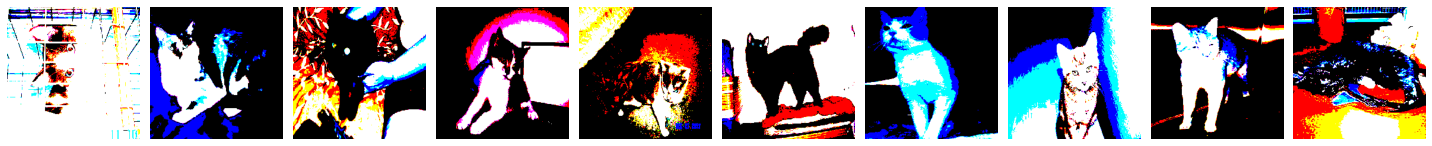

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [13]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [15]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [16]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[30 20]
 [11 39]]


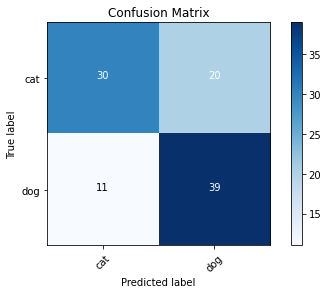

In [19]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Tutorial 14

In [21]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 36s 0us/step


In [22]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [27]:
for layer in model.layers:
    layer.trainable = False

In [28]:
model.add(Dense(units=2, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Tutorial 15

In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 15s - loss: 0.4298 - accuracy: 0.8380 - val_loss: 0.1287 - val_accuracy: 0.9550
Epoch 2/5
100/100 - 10s - loss: 0.1131 - accuracy: 0.9540 - val_loss: 0.0857 - val_accuracy: 0.9700
Epoch 3/5
100/100 - 11s - loss: 0.0675 - accuracy: 0.9730 - val_loss: 0.0767 - val_accuracy: 0.9700
Epoch 4/5
100/100 - 11s - loss: 0.0461 - accuracy: 0.9810 - val_loss: 0.0732 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 10s - loss: 0.0323 - accuracy: 0.9910 - val_loss: 0.0741 - val_accuracy: 0.9700


# Tutorial 16

In [33]:
predictions = model.predict(x = test_batches, verbose=0)

In [34]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [36]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[50  0]
 [ 2 48]]


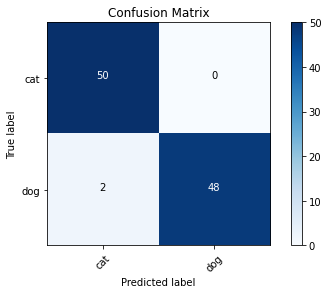

In [37]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Tutorial 17

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [39]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [57]:
def prepare_image(file):
    img_path = 'MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

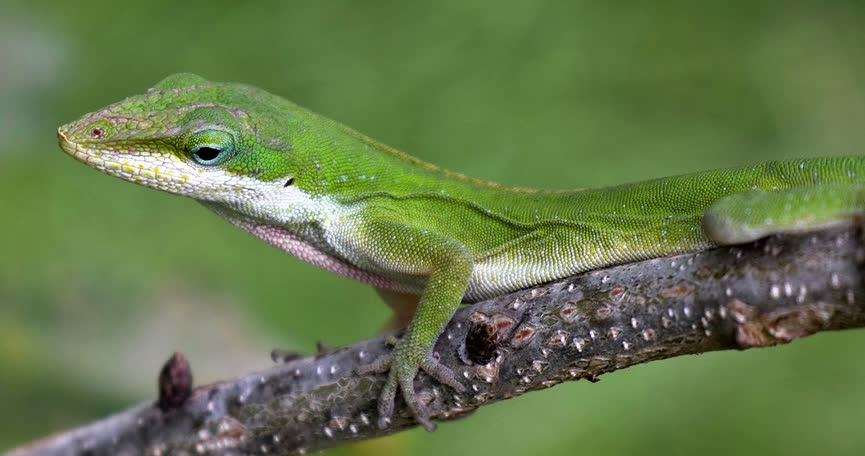

In [58]:
from IPython.display import Image
Image(filename='MobileNet-samples/1.jpg', width=300,height=200) 

In [59]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 1us/step


[[('n01682714', 'American_chameleon', 0.65277255),
  ('n01693334', 'green_lizard', 0.18930103),
  ('n01687978', 'agama', 0.13809675),
  ('n01689811', 'alligator_lizard', 0.013602625),
  ('n01688243', 'frilled_lizard', 0.0043193423)]]

In [60]:
assert results[0][0][1] == 'American_chameleon'

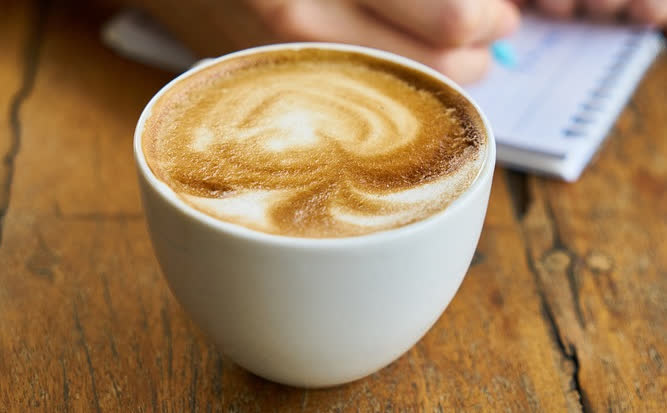

In [61]:
Image(filename='MobileNet-samples/2.jpg', width=300,height=200) 

In [62]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.9766624),
  ('n07930864', 'cup', 0.010093625),
  ('n07932039', 'eggnog', 0.008597022),
  ('n03063599', 'coffee_mug', 0.003665209),
  ('n04597913', 'wooden_spoon', 0.00049637095)]]

In [63]:
assert results[0][0][1] == 'espresso'

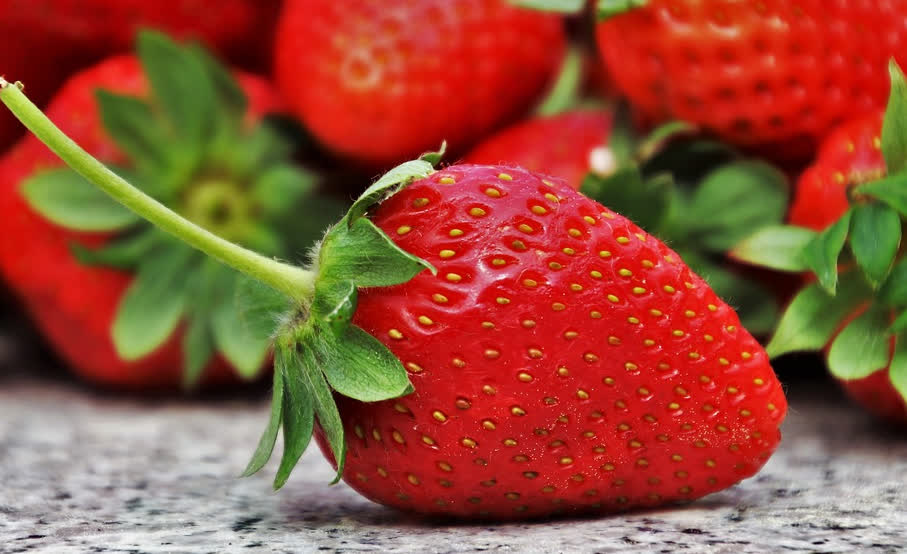

In [64]:
Image(filename='MobileNet-samples/3.jpg', width=300,height=200) 

In [65]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.99999356),
  ('n07749582', 'lemon', 1.243187e-06),
  ('n07747607', 'orange', 8.595206e-07),
  ('n07753275', 'pineapple', 8.273997e-07),
  ('n07768694', 'pomegranate', 6.2611474e-07)]]

In [66]:
assert results[0][0][1] == 'strawberry'

# Tutorial 18

In [67]:
os.chdir('Sign-Language-Digits-Dataset')

In [68]:
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

In [69]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [70]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [71]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

# Tutorial 19

In [72]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [73]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [74]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [75]:
model = Model(inputs=mobile.input, outputs=output)

In [76]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [77]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [78]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
172/172 - 25s - loss: 0.6904 - accuracy: 0.7926 - val_loss: 0.2472 - val_accuracy: 0.9367
Epoch 2/30
172/172 - 7s - loss: 0.1084 - accuracy: 0.9831 - val_loss: 0.0865 - val_accuracy: 0.9867
Epoch 3/30
172/172 - 6s - loss: 0.0554 - accuracy: 0.9959 - val_loss: 0.0680 - val_accuracy: 0.9867
Epoch 4/30
172/172 - 6s - loss: 0.0370 - accuracy: 0.9965 - val_loss: 0.0588 - val_accuracy: 0.9900
Epoch 5/30
172/172 - 6s - loss: 0.0284 - accuracy: 0.9965 - val_loss: 0.0391 - val_accuracy: 0.9933
Epoch 6/30
172/172 - 6s - loss: 0.0198 - accuracy: 0.9988 - val_loss: 0.0308 - val_accuracy: 0.9933
Epoch 7/30
172/172 - 6s - loss: 0.0128 - accuracy: 0.9982 - val_loss: 0.0302 - val_accuracy: 0.9867
Epoch 8/30
172/172 - 6s - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.0254 - val_accuracy: 0.9933
Epoch 9/30
172/172 - 6s - loss: 0.0133 - accuracy: 0.9994 - val_loss: 0.0217 - val_accuracy: 0.9967
Epoch 10/30
172/172 - 7s - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0313 - val_accuracy: 0.990

## Predict sign language digits

In [80]:
test_labels = test_batches.classes

In [81]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [82]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [83]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 2 1 1 1 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


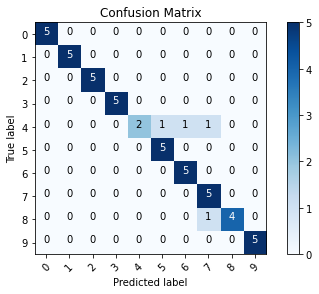

In [84]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Tutorial 20

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [4]:
chosen_image = random.choice(os.listdir('dogs-vs-cats/train/dog'))

In [5]:
image_path = 'dogs-vs-cats/train/dog/' + chosen_image

In [6]:
image_path

'dogs-vs-cats/train/dog/dog.503.jpg'

In [7]:
image = np.expand_dims(plt.imread(image_path),0)

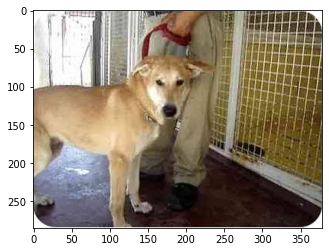

In [8]:
plt.imshow(image[0])

In [100]:
aug_iter = gen.flow(image)

In [101]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

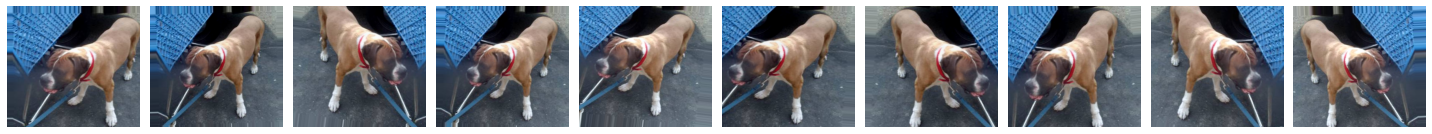

In [102]:
plotImages(aug_images)

In [103]:
aug_iter = gen.flow(image, save_to_dir='dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')

# Tutorial 21

In [108]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [109]:
imgs, labels = next(train_batches)

In [111]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

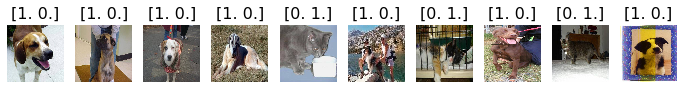

In [112]:
plots(imgs, titles=labels)

In [113]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions

c:\users\david\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[9.75043699e-02, 7.39686438e-05, 2.37977001e-04, 4.01777543e-05,
        4.83230513e-04, 2.76868433e-01, 1.49930501e-02, 6.09711766e-01,
        7.50835534e-05, 1.19630740e-05],
       [9.51484367e-02, 1.85947458e-03, 1.03652803e-03, 7.92444916e-04,
        1.18561344e-04, 1.51109725e-01, 4.86087520e-04, 7.48800397e-01,
        3.18174425e-04, 3.30028328e-04],
       [4.58261073e-01, 9.94366361e-04, 1.27858873e-02, 1.11377507e-03,
        3.09715979e-03, 2.97483295e-01, 8.59065726e-03, 1.95898652e-01,
        2.17685457e-02, 6.60395381e-06],
       [2.00055704e-01, 4.54840396e-04, 3.16013256e-03, 6.22681619e-05,
        1.71187567e-04, 4.30160582e-01, 7.74148712e-03, 3.57654303e-01,
        5.35170664e-04, 4.42408736e-06],
       [3.06138068e-01, 7.01750105e-04, 7.63665140e-03, 9.99084386e-06,
        2.12173865e-04, 4.01869208e-01, 7.29297008e-03, 2.75877506e-01,
        2.59257591e-04, 2.38849066e-06],
       [6.56500086e-02, 8.20917310e-04, 1.01637468e-03, 4.29708598e-05,
   

In [115]:
test_batches.class_indices

{'dog': 0, 'cat': 1}

# Tutorial 22

In [116]:
import numpy as np
import tensorflow as tf
import random as rn

In [117]:
import os
os.environ['PYTHONHASHSEED'] = '0'

In [118]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [119]:
np.random.seed(37)

In [120]:
rn.seed(1254)

In [121]:
tf.random.set_seed(89)

In [128]:
from keras import backend as K

sess = tf.compat.v1.Session()
tf.compat.v1.keras.backend.set_session(sess)

# Tutorial 23 

In [129]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(4, input_shape=(1,), activation='relu', use_bias=True, bias_initializer='zeros'),
    Dense(2, activation='softmax')
])

In [131]:
model.get_weights()

[array([[-0.55454445, -0.02694356, -0.24747324,  0.19590545]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.49596786, -0.736815  ],
        [ 0.20728207, -0.22432399],
        [ 0.13013887, -0.5781977 ],
        [-0.11257601,  0.01672506]], dtype=float32),
 array([0., 0.], dtype=float32)]

# Tutorial 24

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential([
        Dense(3, input_shape=(2,), activation='relu'),
        Dense(2, activation='softmax')
])

In [133]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.get_weights()

[array([[ 0.08327055,  0.09537017, -0.6525384 ],
        [ 0.36884415, -0.383074  ,  0.34086323]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.41420782, -0.6075846 ],
        [ 0.02540624,  0.5752114 ],
        [ 0.70490575,  0.25025296]], dtype=float32),
 array([0., 0.], dtype=float32)]

# Tutorial 25

In [135]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import *
from keras.layers.pooling import *

model = Sequential([
    Conv2D(
        2
        , kernel_size=(3,3)
        , input_shape=(20,20,3)
        , activation='relu'
        , padding='same'
    ),
    Conv2D(
        3
        , kernel_size=(3,3)
        , activation='relu'
        , padding='same'
    ),
    Flatten(),
    Dense(
        2, 
        activation='softmax'
    )
])

In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 20, 20, 2)         56        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 3)         57        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2402      
Total params: 2,515
Trainable params: 2,515
Non-trainable params: 0
_________________________________________________________________


In [137]:
model = Sequential([
    Conv2D(2, kernel_size=(3,3), input_shape=(20,20,3), activation='relu'),
    Conv2D(3, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(2, activation='softmax')
])

In [138]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 18, 18, 2)         56        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 3)         57        
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1538      
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [139]:
model = Sequential([
    Conv2D(2, kernel_size=(3,3), input_shape=(20,20,3), activation='relu', padding='same'),
    Conv2D(3, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(2, activation='softmax')
])

In [140]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 20, 20, 2)         56        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 3)         57        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 602       
Total params: 715
Trainable params: 715
Non-trainable params: 0
_________________________________________________________________
